## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [51]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

In [52]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

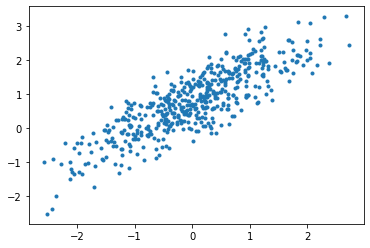

In [53]:
plt.plot(x_train, y_train, '.')

In [54]:
print(x_train.shape)
print(y_train.shape)

(500,)
(500,)


## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [55]:
class Linear_Regression:
    def __init__(self, X, Y, X_test, Y_test):
        """
            (discarded) normalized training data ~ N(0,var)
            initialize weights
        """
        # self.__norm_X_mean = np.mean(X)
        # self.__norm_X_var = np.var(X)
        # self.__X = (X - self.__norm_X_mean) / self.__norm_X_var
        # self.__norm_Y_mean = np.mean(X)
        # self.__norm_Y_var = np.var(X)
        # self.__Y = (Y - self.__norm_Y_mean) / self.__norm_Y_var
        self.__X = X
        self.__Y = Y
        self.__X_test = X_test
        self.__Y_test = Y_test
        self.__w = [0, np.var(Y)]
        # self.__w = [0.79, 0.82]

    def train(self, lr=1e-4, batch_size=32, iter_max=100):
        self.__lr = lr

        train_loss = []
        test_loss = []

        iter_n = 0

        while 1:  # one epoch
            iter_n += 1
            i = 0  # data index

            if iter_n > iter_max:
                break

            # train with mini-batches
            while 1:
                n = batch_size if i + batch_size <= self.__Y.shape[0] else self.__Y.shape[
                                                                               0] - i  # batch size
                X = self.__X[i: i + n]
                Y_GT = self.__Y[i: i + n]
                Y_pred = self.__w[0] + (self.__w[1] * X)

                self.__w[0] = self.__w[0] - (lr * ((1 / n) *
                                                   np.sum(Y_pred - Y_GT)))
                self.__w[1] = self.__w[1] - (lr * ((1 / n) *
                                                   np.sum((Y_pred - Y_GT) * X)))

                if i + batch_size >= self.__Y.shape[0]:
                    break
                else:
                    i += batch_size

            # print stat
            train_loss.append(self.__Loss_func())
            test_loss.append(self.predict(self.__X_test, self.__Y_test))
            print("Iteration: {} Loss: {:.6f}".format(iter_n, train_loss[iter_n - 1]))

        self.__train_loss = train_loss
        self.__test_loss = test_loss

    def print_weights(self):
        print("[w0,w1] = {}".format(self.__w))

    def predict(self, X_test, Y_test):
        # X_test = (X_test - self.__norm_X_mean) / self.__norm_X_var  # normalize
        # Y_test = (Y_test - self.__norm_Y_mean) / self.__norm_Y_var  # normalize

        Y_pred = self.__w[0] + (self.__w[1] * X_test)

        MSE = (1 / Y_test.shape[0]) * np.sum((Y_pred - Y_test) ** 2)
        print("MSE: {:.7f}".format(MSE))
        return MSE

    def __Loss_func(self):
        Y_pred = self.__w[0] + (self.__w[1] * self.__X)
        return (1 / self.__Y.shape[0]) * np.sum((Y_pred - self.__Y) ** 2)

    def plot_l_curve(self):
        """ plot learning curve: train loss & test loss"""
        plt.plot(np.arange(len(self.__train_loss)), self.__train_loss, label='train loss')
        plt.plot(np.arange(len(self.__test_loss)), self.__test_loss, label='val loss')
        plt.legend(loc='upper center')
        plt.ylabel('Loss')
        plt.xlabel('Iterations')
        plt.title('learning curve')
        plt.show()

In [56]:
# Main program
model = Linear_Regression(x_train, y_train, x_test, y_test)
model.train(lr=0.5, batch_size=x_train.shape[0], iter_max=40)
model.print_weights()

MSE: 0.1945007
Iteration: 1 Loss: 0.424714
MSE: 0.0913351
Iteration: 2 Loss: 0.307225
MSE: 0.0696364
Iteration: 3 Loss: 0.277484
MSE: 0.0664425
Iteration: 4 Loss: 0.269939
MSE: 0.0668323
Iteration: 5 Loss: 0.268021
MSE: 0.0675549
Iteration: 6 Loss: 0.267532
MSE: 0.0680622
Iteration: 7 Loss: 0.267407
MSE: 0.0683592
Iteration: 8 Loss: 0.267375
MSE: 0.0685218
Iteration: 9 Loss: 0.267367
MSE: 0.0686083
Iteration: 10 Loss: 0.267365
MSE: 0.0686537
Iteration: 11 Loss: 0.267364
MSE: 0.0686774
Iteration: 12 Loss: 0.267364
MSE: 0.0686897
Iteration: 13 Loss: 0.267364
MSE: 0.0686961
Iteration: 14 Loss: 0.267364
MSE: 0.0686994
Iteration: 15 Loss: 0.267364
MSE: 0.0687011
Iteration: 16 Loss: 0.267364
MSE: 0.0687020
Iteration: 17 Loss: 0.267364
MSE: 0.0687025
Iteration: 18 Loss: 0.267364
MSE: 0.0687027
Iteration: 19 Loss: 0.267364
MSE: 0.0687028
Iteration: 20 Loss: 0.267364
MSE: 0.0687029
Iteration: 21 Loss: 0.267364
MSE: 0.0687029
Iteration: 22 Loss: 0.267364
MSE: 0.0687030
Iteration: 23 Loss: 0.2673

### Plot learning Curve

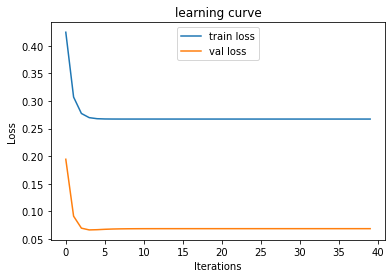

In [57]:
model.plot_l_curve()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [58]:
model.predict(x_test, y_test)

MSE: 0.0687030


0.06870297320719052